In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import xarray as xr
from tqdm import tqdm
from RPLB_acc_NoSTC_2D import RPLB_acc_NoSTC_2D

In [5]:
#set pure spectral properties
lambda_0 = 800e-9 #central wavelength
tau_0 = 10e-15 #FL pulse duration 1/e2 intensity half-width (same def as beam waist)
#set initial beam waist
w_0 = 4e-6
# calculate Rayleigh range
z_R = (np.pi*w_0**2)/(lambda_0)
# beam power
P = 100e12
# CEP
Psi_0 = 0.6
# chirp
GDD_0 = 0 #Group Delay Dispersion fs^2
GDD = GDD_0*(1e-15)**2
# intial electron position and velocity
z_0 = 0.005*z_R
beta_0 = 0
# set tuning parameter
r_0 = np.linspace(0,lambda_0/4,100)

In [6]:
KE_final = np.zeros(len(r_0))
z_final = np.zeros(len(r_0))
r_final = np.zeros(len(r_0))

for i in range(0, len(r_0)):
    t, z, r, KE_final[i] = RPLB_acc_NoSTC_2D(lambda_0, tau_0, w_0, P, Psi_0, GDD, z_0, r_0[i], beta_0)
    z_final[i] = z[-1]
    r_final[i] = r[-1]


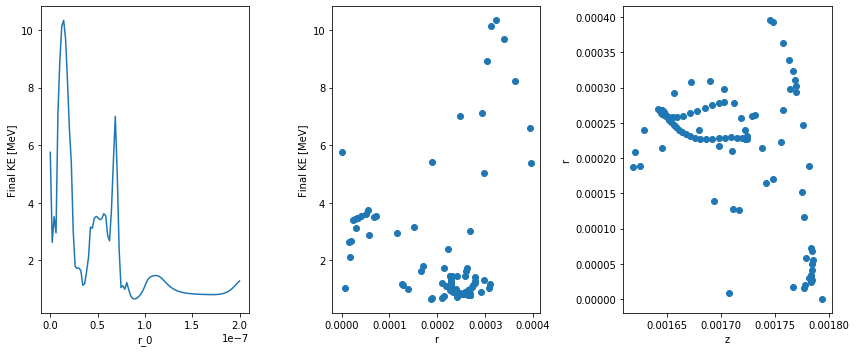

In [7]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.plot(r_0, KE_final/1e6)
plt.xlabel('r_0')
plt.ylabel('Final KE [MeV]')
plt.subplot(1,3,2)
plt.plot(np.abs(r_final), KE_final/1e6, ls='none', marker='o')
plt.xlabel('r')
plt.ylabel('Final KE [MeV]')
plt.subplot(1,3,3)
plt.plot(z_final, np.abs(r_final), ls='none', marker='o')
plt.xlabel('z')
plt.ylabel('r')

plt.tight_layout()